# Colab1: Linear Regression on the Boston house dataset (DUE 6. November via Felix)
In this practical you will use a dataset that was taken from the StatLib library which is maintained at Carnegie Mellon University.The Boston house dataset has 506 samples and each sample contains 13 features. The goal is to learn a linear model to predict house prices.


Your code is completely in python.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn==1.1.3
import sklearn

import seaborn as sns
import tensorflow as tf
sns.set_style("whitegrid")
sns.set_context("poster")


from sklearn.datasets import load_boston

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [5]:
boston = load_boston()
print( boston.keys())
print(boston.data.shape)

print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

In [9]:
X_ = boston.data
print(X_)
y_ = boston.target
print(y_)
mu = np.mean(X_,axis=0)
print(mu)
sigma = np.std(X_,axis=0)
print(sigma)
X_ = (X_ - mu)/sigma #data normalization
print(y_.shape)
print(X_.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [15]:
print( X_[0:400].shape)
print( np.reshape(y_[0:400],[400,1]).shape)


(400, 13)
(400, 1)


# Split the data into training: first 400 rows, and validation: rest. (10 Pts)

In [17]:
#your code here:
X_train = X_[0:400]
y_train = np.reshape(y_[0:400],[400,1])
#add column of ones in the first column
col = np.ones(400);

X_train = np.c_[col,X_train]
print('data training shape: ', X_train.shape)
print('target training shape: ', y_train.shape)

X_validation = X_[401:]
#add column of ones in the first column
col = np.ones(105)
X_validation= np.c_[col,X_validation]
print('validation data shape: ', X_validation.shape)
y_validation = np.reshape(y_[401:],[105,1])

data training shape:  (400, 14)
target training shape:  (400, 1)
validation data shape:  (105, 14)


# Implement the *Normal Equations* in Python to have the optimal parameters for this model. (25 Pts)

\begin{align}\boldsymbol{\hat \theta} = (X^T X)^{-1}X^T \boldsymbol{y}\end{align}
then apply the found parameters to estimate the prices for the validation data set: \begin{align}\boldsymbol{\hat y}_{validation} = X_{validation} \boldsymbol{\hat\theta}\end{align}

In [23]:
#your code here (opt = theta_hat above):
opt = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train),X_train)),np.transpose(X_train)),y_train)
print(opt)
#
y_hat_validation =   np.matmul(X_validation,opt) 
print(y_hat_validation.shape)


[[23.28337581]
 [-1.643388  ]
 [ 1.0305089 ]
 [ 0.37845963]
 [ 0.43550243]
 [-1.73595149]
 [ 3.43080791]
 [ 0.07337369]
 [-2.7237948 ]
 [ 4.21699484]
 [-2.59301797]
 [-1.74926608]
 [-0.1178641 ]
 [-3.69508319]]
(105, 1)


Show a scatterplot of the actual price versus predicted price.

Text(0.5, 1.0, 'Prices vs Predicted prices')

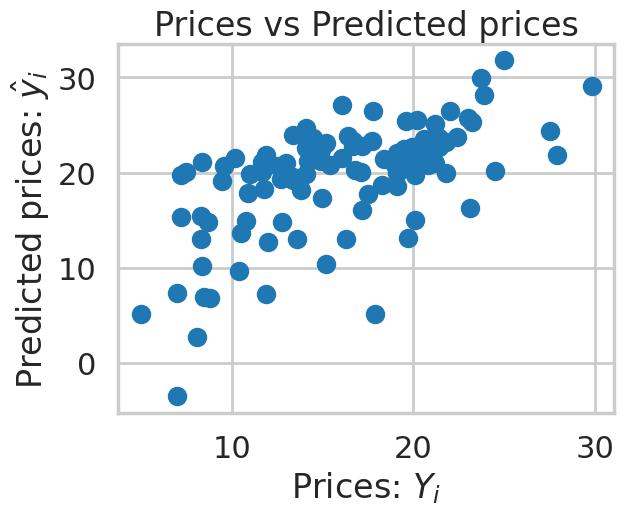

In [24]:
#==============================================================================
plt.scatter(y_validation, y_hat_validation)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices")
#==============================================================================


# Gradient Descent (60 Pts)

> Eingerückter Textblock


Define $\theta$ as the parameter to be updated. The size is 13+1=14. Implement the linear regression by computing the gradient and update the parameters iteratively. Use approximately 1000 iterations. You can set alpha to 0.0001 Set $\theta_0$ to random numbers. Check out `np.random.random_sample`. 

---


\begin{align}
\boldsymbol{\theta}_{k +1}= \boldsymbol{\theta}_{k} - \alpha\nabla{ J(\boldsymbol{\theta})}
\end{align}
where \begin{align}\nabla J(\boldsymbol{\theta})=X^T (\boldsymbol{\hat y_k} -\boldsymbol{y})\end{align} and \begin{align}\boldsymbol{\hat y_k} = X\cdot  \boldsymbol{\theta}_{k}\end{align}



In [26]:
print(np.random.random_sample())

0.6870563733877679


In [ ]:
#your code here
theta = 

In [ ]:
print(np.shape(theta), theta)

(14, 1) [[23.2510712 ]
 [-1.58713806]
 [ 1.00320124]
 [ 0.28336973]
 [ 0.45677143]
 [-1.69386817]
 [ 3.43808292]
 [ 0.05692033]
 [-2.73554057]
 [ 3.79302545]
 [-2.20373983]
 [-1.72977565]
 [-0.02557538]
 [-3.69966023]]


**What happens if you set (10 Pts)** 

1.   $\alpha= 0.01$?
2.   $\alpha= 0.00001$?

For which setting can you achieve the correct results by increasing the number of iterations?

**Your answer here.**

# Price estimation for validation dataset (5 Pts)
Estimate again the prices for the validation dataset with the iteratively calculated $\theta$.

In [ ]:
#
y_hat_validation = 

Plot again the real prices vs. predicted prices of the gradient descent procedure.

In [ ]:
plt.scatter(y_validation, y_hat)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
